In [22]:
import pandas
import matplotlib.pyplot as plt
import seaborn
import numpy
import IPython

%matplotlib inline

In [23]:
pubmed_df = pandas.read_table('data/pubmed.tsv.gz', compression='gzip')
pubmed_df = pubmed_df[['doi', 'pubmed_id', 'journal', 'journal_abbrev']]

In [24]:
from datetime import datetime as dt
import time

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction


In [25]:
date_df = pandas.read_table('data/dates.tsv', parse_dates=['received', 'accepted', 'published'])
date_df['acceptance_days'] = ((date_df.accepted - date_df.received) / numpy.timedelta64(1, 'D')).astype(int)
date_df['publication_days'] = ((date_df.published - date_df.accepted) / numpy.timedelta64(1, 'D')).astype(int)
date_df['total_days'] = ((date_df.published - date_df.received) / numpy.timedelta64(1, 'D')).astype(int)
date_df['published_year'] = date_df.published.map(toYearFraction)
date_df = date_df.merge(pubmed_df)
len(date_df)

5369

In [26]:
date_df.head()

,doi,received,accepted,published,acceptance_days,publication_days,total_days,published_year,pubmed_id,journal,journal_abbrev
0,10.1371/journal.ppat.1004931,2014-11-14,2015-05-04,2015-06-09,171,36,207,2015.435502,26057557,PLoS pathogens,PLoS Pathog
1,10.1371/journal.pntd.0001279,2010-10-18,2011-07-05,2011-08-16,260,42,302,2011.621804,21858242,PLoS neglected tropical diseases,PLoS Negl Trop Dis
2,10.1371/journal.pbio.1001585,2013-02-26,2013-05-02,2013-06-11,65,40,105,2013.440982,23776409,PLoS biology,PLoS Biol
3,10.1371/journal.pmed.0050101,2007-08-14,2008-03-18,2008-05-27,217,70,287,2008.401526,18507497,PLoS medicine,PLoS Med
4,10.1371/journal.pcbi.1003558,2013-07-09,2014-02-19,2014-04-17,225,57,282,2014.290297,24743341,PLoS computational biology,PLoS Comput Biol


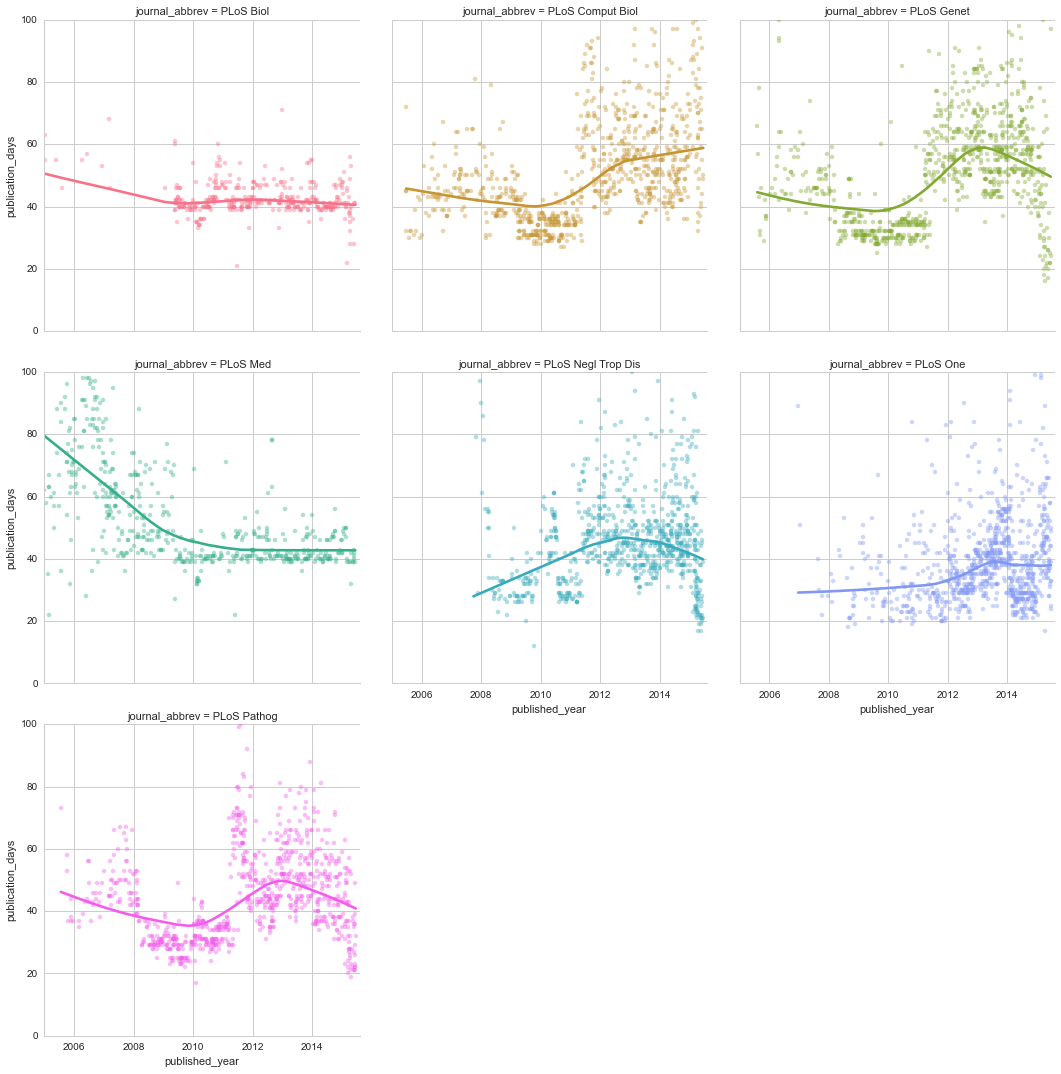

In [27]:
IPython.core.pylabtools.figsize(14, 10)
seaborn.set_style('whitegrid')
grid = seaborn.lmplot(
    x='published_year', y='publication_days',
    data=date_df, robust=False,
                      lowess=True, col='journal_abbrev', hue='journal_abbrev', ci=95, scatter=True, col_wrap=3,
              scatter_kws={'alpha': 0.4},  #markers=['8', '>', '<', '^', 'v', 'D', 's']
);
#grid.set(yscale='log')
plt.xlim((2005, 2015.6))
plt.ylim((0, 100))
#plt.xlabel('Date of Publication')
#plt.ylabel('Days from Acceptance to Publication')
grid.savefig('figure/scrape-delays.pdf')
#grid.savefig('figure/delays.png', dpi=300)

In [28]:
date_df.head()

,doi,received,accepted,published,acceptance_days,publication_days,total_days,published_year,pubmed_id,journal,journal_abbrev
0,10.1371/journal.ppat.1004931,2014-11-14,2015-05-04,2015-06-09,171,36,207,2015.435502,26057557,PLoS pathogens,PLoS Pathog
1,10.1371/journal.pntd.0001279,2010-10-18,2011-07-05,2011-08-16,260,42,302,2011.621804,21858242,PLoS neglected tropical diseases,PLoS Negl Trop Dis
2,10.1371/journal.pbio.1001585,2013-02-26,2013-05-02,2013-06-11,65,40,105,2013.440982,23776409,PLoS biology,PLoS Biol
3,10.1371/journal.pmed.0050101,2007-08-14,2008-03-18,2008-05-27,217,70,287,2008.401526,18507497,PLoS medicine,PLoS Med
4,10.1371/journal.pcbi.1003558,2013-07-09,2014-02-19,2014-04-17,225,57,282,2014.290297,24743341,PLoS computational biology,PLoS Comput Biol
